![](http://osloyi5le.bkt.clouddn.com/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%B7%A5%E7%A8%8B%E5%B8%88banner.png)

## Cancer Prediction: Data Analysis and Modeling Based on Logistic Regression

In [1]:
import numpy as np # 科学计算
import pandas as pd # 数据处理
import seaborn as sns # 可视化
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 读取数据
data = pd.read_csv('./medical_data.csv')

In [2]:
# 查看数据内容
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# 查看数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

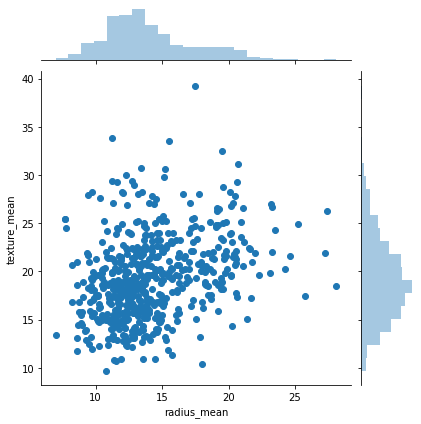

In [4]:
# 通过联合绘图查看维度之间的相关性
sns.jointplot('radius_mean', 'texture_mean', data=data)

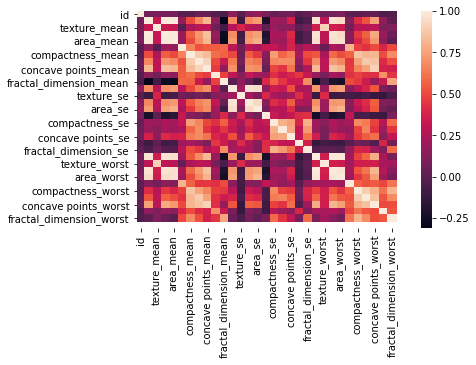

In [5]:
# 通过热力图查看相关性
sns.heatmap(data.corr())

In [6]:
# 取出对应的特征和标签
X = data[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst']]
y = data['diagnosis']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# 切分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logModel = LogisticRegression()

In [11]:
# 逻辑回归拟合数据
logModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
X_train

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst
178,14.000,29.02,88.18,608.8,0.08125
421,16.460,18.34,114.10,809.2,0.13120
57,17.870,30.70,115.70,985.5,0.13680
514,17.580,28.06,113.80,967.0,0.12460
548,10.930,25.59,69.10,364.2,0.11990
456,13.120,38.81,86.04,527.8,0.14060
511,15.610,17.58,101.70,760.2,0.11390
69,13.460,19.76,85.67,554.9,0.12960
410,13.050,36.32,85.07,521.3,0.14530
382,12.570,28.71,87.36,488.4,0.08799


In [16]:
y_train

178    B
421    B
57     M
514    M
548    B
456    B
511    B
69     B
410    B
382    B
41     M
70     M
183    B
333    B
324    B
392    M
427    B
43     M
36     M
209    B
330    M
344    B
555    B
170    B
375    B
143    B
360    B
449    M
527    B
227    B
      ..
440    B
436    B
519    B
284    B
99     M
264    M
239    M
457    B
503    M
105    M
343    M
76     B
275    B
249    B
418    B
59     B
371    B
136    B
506    B
49     B
40     M
477    B
5      M
110    B
316    B
552    B
393    M
75     M
337    M
523    B
Name: diagnosis, Length: 398, dtype: object

In [12]:
# 逻辑回归预测
predictions = logModel.predict(X_test)

In [13]:
from sklearn.metrics import classification_report

In [14]:
# 评估结果
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           B       0.93      0.94      0.93       105
           M       0.91      0.88      0.89        66

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171

